#Import libraries

In [ ]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install fuzzywuzzy  
from fuzzywuzzy import fuzz
from fuzzywuzzy import process 



# load Data






In [ ]:
df = pd.read_csv("candyhierarchy2017.csv")
df

# Cleaning

*   Rename the columns for easily accessed



*   Drop useless columns
* Search for duplicated values
* Most people who record only the first 6 columns leave the rest of the survey empty, so we should have at least 7 columns to get insights from the data 



In [ ]:
#rename the columns for easily accessed
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace('\d+', '').str.replace('q:', '').str.replace('q', '').str.replace('|', '').str.strip()
df


In [5]:
#**Drop the Internal ID column, since it's useless
df.drop("internal id", axis = 1, inplace = True)

In [6]:
#drop useless columns
df["joy other"].value_counts().head(10)
df["despair other"].value_counts().head(10)
df.drop(columns=["joy other","despair other", "other comments","click coordinates (x, y)","unnamed:"], inplace = True)

In [7]:
# we should have at least 7 columns to get insights from the data
df = df.dropna(how = "all", thresh = 7)

In [ ]:
duplicate = df.duplicated()
print(duplicate.sum())

In [ ]:
df.info()

In [ ]:
df.isna().sum()

**Going Out** **Column**

* Replace Nan values with "missing"


In [ ]:
df["going out?"].unique()

In [ ]:
df["going out?"].fillna('Missing', inplace=True)
df["going out?"].head(20)

>**Gender Column**
 * Replace Nan values with ""I'd rather not say""


In [ ]:
#Gender column
df["gender"].fillna("I'd rather not say", inplace=True)
df["gender"].value_counts(dropna = False)

>

**Age Column**
* missing values
-outliers
-data type



In [ ]:
df['age'].unique()

In [ ]:
#with using ‘coerce’ then invalid parsing will be set as NaN.
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['age'].unique()

In [ ]:
df['age'].describe()

In [ ]:
df['age'].value_counts()[1000]
df.loc[df['age'] > 100, 'age'] = np.nan

In [ ]:
#dealing with outliers
sns.catplot(x = "age",
             data = df,
             kind = "box")

In [ ]:
sns.displot(df, x="age")

In [ ]:

#data points that lie 1.5 times of IQR above Q3 and below Q1 are outliers.
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
low_bound = Q1 - 1.5 * IQR
up_bound = Q3 + 1.5 * IQR
low_bound 

In [ ]:
df.loc[df["age"] < low_bound]= np.nan
df.loc[df["age"] > up_bound]= np.nan
df["age"].describe()

In [ ]:
df["age"].value_counts(dropna = False)

In [ ]:
#replace missing values with median
median = df["age"].median()
df["age"].fillna(median,inplace=True)
df["age"].unique()


In [ ]:
sns.displot(df, x="age")

>**Country** **Column**

In [ ]:

df["country"] = df["country"].str.lower()
df["country"] = df["country"].str.strip()




Remapping

In [ ]:
#FOR USA
#the united state =  united state = usa = us

unique_vals = df["country"].unique()
matches1 = process.extract('usa',unique_vals, limit = len(unique_vals))
#67 for usa
for match in matches1:
  if match[1] >= 67:
    df.loc[df["country"]==match[0],"country" ] = 'usa'
matches2 = process.extract('united states',unique_vals, limit = len(unique_vals))
#90 for united state
for match in matches2:
  if match[1] >= 90:
    df.loc[df["country"]==match[0], "country"] = 'usa'
matches2
df["country"].unique()
matches3 = process.extract('america',unique_vals, limit = len(unique_vals))
#77 for america
for match in matches3:
  if match[1] >= 77:
    df.loc[df["country"]==match[0], "country"] = 'usa'
df["country"].unique()
df

In [ ]:
#FOR UK
#england = uk = united kingdom
unique_vals = df["country"].unique()
matches1 = process.extract('england',unique_vals, limit = len(unique_vals))
matches1
#86 for england
for match in matches1:
  if match[1] >= 86:
    df.loc[df["country"]==match[0], "country"] = 'england'
df["country"].replace({"united kingdom" : "uk"}, inplace =True)
df["country"].replace({"england" : "uk"}, inplace =True)

df

In [ ]:
num_vals= df["country"].value_counts()
num_vals

In [ ]:
#replace all the countries that count less than 7 with "Other"
i = pd.DataFrame(df['country'].value_counts())
ncountry = i[i['country']>7] 
#ncountry.iloc[:,0]


In [ ]:
#replace missing values with "Other"
df["country"].fillna("Other",inplace=True)

>**STATE, PROVINCE, COUNTY, ETC Column**



In [ ]:
df.rename(columns ={"state, province, county, etc" : "state"}, inplace = True)
df

In [ ]:
#replace missing values with "Other"
df["state"].fillna("Other",inplace=True)

>**Dress** **column**

In [ ]:
#Repalce missing values with "Other"
df["dress"].fillna("Other", inplace = True)
df["dress"].value_counts(dropna=False)
df["dress"]

>**Day column**

In [183]:
#Repalce missing values with "Other"
df["day"].value_counts(dropna=False)
df["day"].fillna("other",inplace=True)

>**Candy Column**

In [ ]:
candy_col= df.iloc[:,5:108]
candy_col

In [ ]:
candy_col.isna().sum().head()

In [202]:
#Repalce missing values with "No idea"
candy_col.fillna("No Idea", inplace = True)


In [204]:
candy_col["grand bar"].value_counts()

JOY        858
MEH        743
No Idea    127
DESPAIR     78
Name: grand bar, dtype: int64

In [ ]:
x = candy_col[candy_col == "JOY"]
x

In [ ]:
candy_col["grand bar"] = candy_col["grand bar"].astype('category')
df["grand bar"].describe()

>**Media column**

In [ ]:
#["media [daily dish]", "media [science]","media [espn]","media [yahoo]"]

In [ ]:
#Shorter Answer?
df["media [daily dish]"].replace(1,"daily dish", inplace =True)
df["media [science]"].replace(1,"science", inplace =True)
df["media [espn]"].replace(1,"espn", inplace =True)
df["media [yahoo]"].replace(1,"yahoo", inplace =True)

In [ ]:
df["media"] = df["media [daily dish]"].fillna('') + df["media [science]"].fillna('')+ df["media [espn]"].fillna('')+ df["media [yahoo]"].fillna('')
df["media"]
df

In [ ]:
df.drop(columns =["media [daily dish]", "media [science]","media [espn]","media [yahoo]"], inplace =True)



In [ ]:
df["media"].fillna('other', inplace =True)
df["media"].unique()

#Insights
-This part is a bit hard, I can't find useful relations 

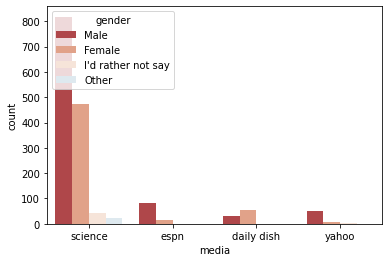

In [93]:
#science website is the most likely checked out
#daily dish is checked out by females more than males
sns.set_palette("RdBu")

c_order = ["science", "espn", "daily dish", "yahoo"]
sns.countplot(x="media",
            data = df,
            order = c_order
            ,hue ="gender")

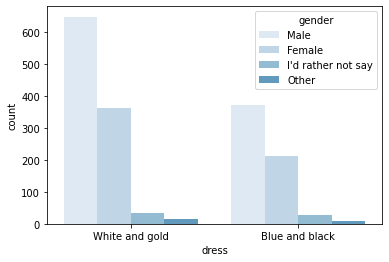

In [225]:
#Most people see the dress in white and gold 
sns.set_palette("Blues")
c_order = ["White and gold", "Blue and black"]
sns.countplot(x="dress",
            data = df,
            order = c_order,
            hue = "gender")

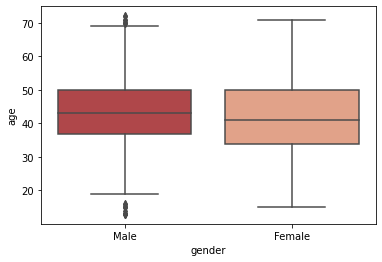

In [130]:


c_order = ["Male", "Female"]
sns.boxplot(y="age",
            x = "gender",
            data = df,
            order =c_order )

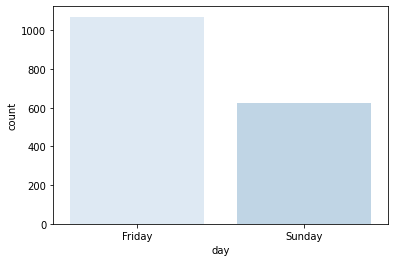

In [230]:
#Most people like Friday more than Sunday
c_order = ["Friday", "Sunday"]
sns.countplot(x ="day",
            data = df,
            order = c_order)

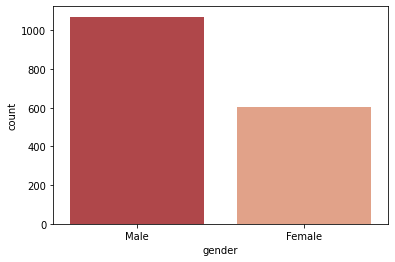

In [136]:
#Males are most likely to fill out surveys more than females
c_order = ["Male", "Female"]
sns.countplot(x = "gender",
            data = df,
            order =c_order )

In [ ]:
#Most people are from USA
sns.countplot(x="country",
            data = df)